In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.utils import np_utils
#from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os


Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = []
labels = []

for folder in os.listdir('/content/drive/My Drive/New folder'):
  img_dir = os.path.join('/content/drive/My Drive/New folder',folder)
  
  for img in os.listdir(img_dir):
    image = cv2.imread(os.path.join(img_dir,img))
    image = cv2.resize(image, (150,150))

    data.append(image)
    labels.append(folder)
  

In [0]:
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = np_utils.to_categorical(labels, 8)

In [0]:
labels.shape

(906, 8)

In [0]:
data = np.array(data, dtype="float") / 255.0

In [0]:
data.shape

(906, 150, 150, 3)

In [0]:


# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, 
                                                  labels,
                                                  stratify=labels,
	                                                test_size=0.25,
                                                  shuffle = True,
                                                  random_state=42)



In [0]:
valy = testY[0:11]
valx = testX[0:11]
testX = testX[11:]
testY = testY[11:]

[0. 0. 0. 0. 0. 0. 1. 0.]


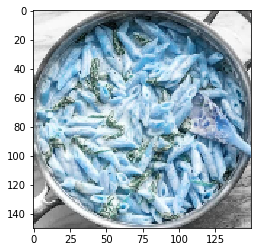

In [0]:
from matplotlib import pyplot as plt
plt.imshow(valx[0], interpolation='nearest')
print(valy[0])
plt.show()

In [0]:
trainY.shape, trainX.shape

((679, 8), (679, 150, 150, 3))

In [0]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                 include_top = False,
                 input_shape = (150, 150, 3))

In [0]:
from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras import models
from keras import layers

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(rate=1- 0.5))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(rate = 1-0.5))
model.add(layers.Dense(8, activation = 'sigmoid'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                

In [0]:
conv_base.trainable = False

In [0]:
aug = ImageDataGenerator()


In [0]:
aug = ImageDataGenerator(   horizontal_flip = True,
                              rotation_range=45,
                              width_shift_range= 0.15,
                              height_shift_range= 0.15,
                              zoom_range = 0.5)

In [0]:
from keras import optimizers
INIT_LR = 1e-1
BS = 8
EPOCHS = 5

model.compile(loss="binary_crossentropy",
              optimizer='adam',
            	metrics=["accuracy"])

In [0]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2)]

In [0]:



# train the network
print("[INFO] training network for {} epochs...".format(EPOCHS))
H = model.fit_generator(
	aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY),
	steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS)

[INFO] training network for 5 epochs...
Epoch 1/5
84/84 [==============================] - 195s 2s/step - loss: 0.4849 - accuracy: 0.8064 - val_loss: 0.3834 - val_accuracy: 0.8750
Epoch 2/5
84/84 [==============================] - 195s 2s/step - loss: 0.4229 - accuracy: 0.8687 - val_loss: 0.3805 - val_accuracy: 0.8750
Epoch 3/5
84/84 [==============================] - 196s 2s/step - loss: 0.4117 - accuracy: 0.8722 - val_loss: 0.3775 - val_accuracy: 0.8750
Epoch 4/5
84/84 [==============================] - 196s 2s/step - loss: 0.4000 - accuracy: 0.8743 - val_loss: 0.3769 - val_accuracy: 0.8750
Epoch 5/5
37/84 [============>.................] - ETA: 1:23 - loss: 0.4027 - accuracy: 0.8750

In [0]:
len(data)

906

[INFO] evaluating network...


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

baingan_ka_bharta       0.00      0.00      0.00        27
    bhindi_bharwa       0.00      0.00      0.00        25
    gravy_chicken       0.14      1.00      0.25        31
 kala_chana_sabji       0.00      0.00      0.00        31
maggi_street_food       0.00      0.00      0.00        24
       matar_aloo       0.00      0.00      0.00        29
            pasta       0.00      0.00      0.00        21
 tandoori_chicken       0.00      0.00      0.00        28

         accuracy                           0.14       216
        macro avg       0.02      0.12      0.03       216
     weighted avg       0.02      0.14      0.04       216



KeyError: ignored

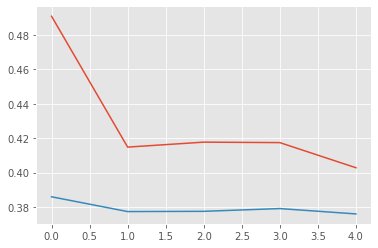

In [0]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=BS)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=le.classes_))
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])

In [0]:
import matplotlib.pyplot as plt

epochs =15
acc = H.history["accuracy"]
loss = H.history['loss']

val_acc = H.history['val_accuracy']
val_loss = H.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
for key in H.history.values():
    print(key)


In [0]:
#Graphing our training and validation
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(testX)

acc = accuracy_score(testY, np.round(preds))*100
cm = confusion_matrix(testY, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

In [0]:
preds = model.predict(valx)

In [0]:
np.argmax(preds, axis=1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
from sklearn.metrics import classification_report

preds
report = classification_report(testY, preds)
print(report)

In [0]:
import pandas as pd
pd.Series(np.argmax(trainY,axis=1)).value_counts()

In [0]:
pd.Series(np.argmax(testY,axis=1)).value_counts()

In [0]:
valy = testY[0:11]
valx = testX[0:11]

In [0]:
from matplotlib import pyplot as plt
plt.imshow(valx[0], interpolation='nearest')
print(valy[0])
plt.show()

In [0]:
valy[0]